In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pylattica.core import BasicController, SynchronousRunner, SimulationState
from pylattica.structures.square_grid import MooreNbHoodBuilder, VonNeumannNbHood2DBuilder
from pylattica.discrete.state_constants import DISCRETE_OCCUPANCY
from pylattica.models.game_of_life import Maze, Anneal, Diamoeba, Seeds, Life, GameOfLifeController

# Life-like Cellular Automata

There are many variations on Conway's Game of Life which [Life-like Automata](https://conwaylife.com/wiki/Life-like_cellular_automaton). There are implementations of these in pylattica for your enjoyment.

In [3]:
from pylattica.discrete import PhaseSet
from pylattica.structures.square_grid.grid_setup import DiscreteGridSetup
from pylattica.visualization import SquareGridArtist2D, ResultArtist, DiscreteCellArtist

phases = PhaseSet(["dead", "alive"])
setup = DiscreteGridSetup(phases)
cell_artist = DiscreteCellArtist.from_phase_list(phases.phases)

#### Life

100%|████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:01<00:00, 31.50it/s]


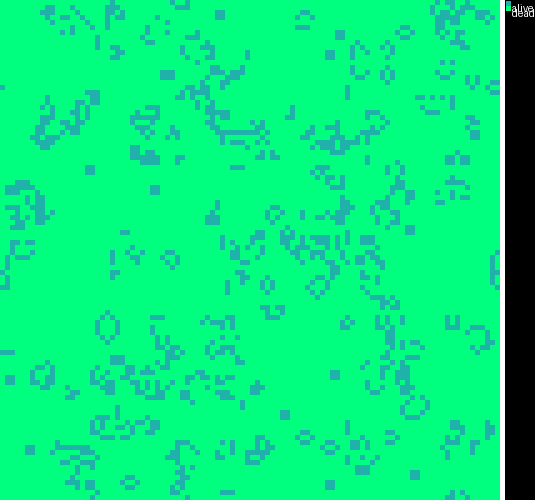

In [4]:
starting_state = setup.setup_noise(100, ["dead", "alive"])
artist = SquareGridArtist2D(starting_state.structure, cell_artist)
controller = GameOfLifeController(starting_state.structure, Life)
runner = SynchronousRunner(parallel=False)
result = runner.run(starting_state.state, controller, 60)
artist.jupyter_show(result.last_step, cell_size=5)

In [5]:
ResultArtist(artist, result).to_gif("Life.gif", wait=0.2, cell_size=6)

#### Seeds

100%|████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:01<00:00, 56.88it/s]


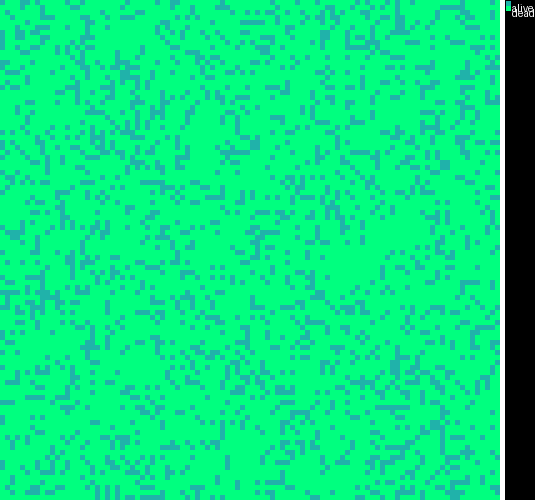

In [6]:
starting_state = setup.setup_noise(100, ["dead", "alive"])
artist = SquareGridArtist2D(starting_state.structure, cell_artist)
controller = GameOfLifeController(starting_state.structure, Seeds)
runner = SynchronousRunner(parallel=True)
result = runner.run(starting_state.state, controller, 60)
artist.jupyter_show(result.last_step, cell_size=5)
ResultArtist(artist, result).to_gif("Seeds.gif", wait=0.2, cell_size=6)

#### Diamoeba

100%|████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:01<00:00, 57.28it/s]


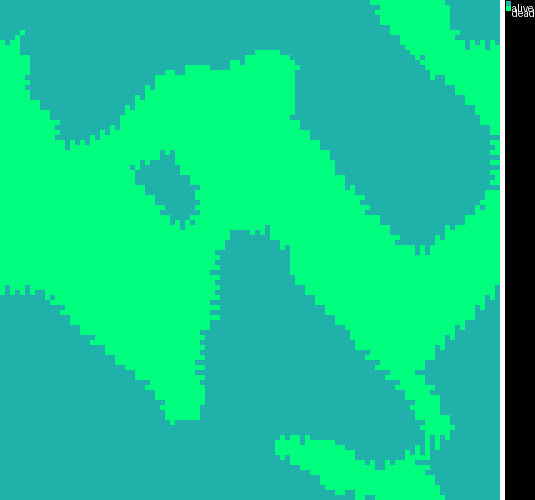

In [7]:
starting_state = setup.setup_noise(100, ["dead", "alive"])
artist = SquareGridArtist2D(starting_state.structure, cell_artist)
controller = GameOfLifeController(starting_state.structure, Diamoeba)
runner = SynchronousRunner(parallel=True)
result = runner.run(starting_state.state, controller, 60)
artist.jupyter_show(result.last_step, cell_size=5)
ResultArtist(artist, result).to_gif("Diamoeba.gif", wait=0.2, cell_size=6)

### Anneal

100%|████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:01<00:00, 45.40it/s]


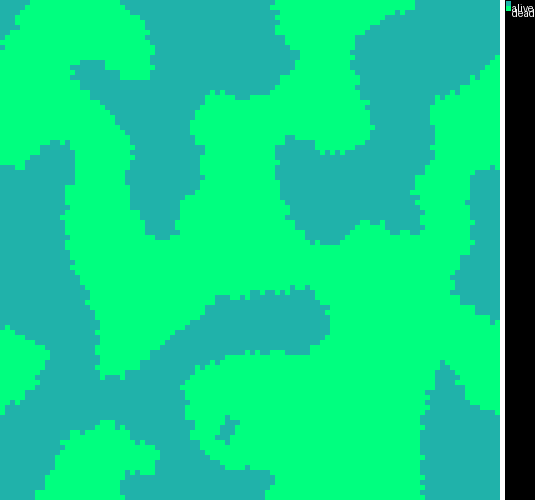

In [8]:
starting_state = setup.setup_noise(100, ["dead", "alive"])
artist = SquareGridArtist2D(starting_state.structure, cell_artist)
controller = GameOfLifeController(starting_state.structure, Anneal)
runner = SynchronousRunner(parallel=True)
result = runner.run(starting_state.state, controller, 60)
artist.jupyter_show(result.last_step, cell_size=5)
ResultArtist(artist, result).to_gif("Anneal.gif", wait=0.2, cell_size=6)

### Maze

100%|████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:01<00:00, 57.11it/s]


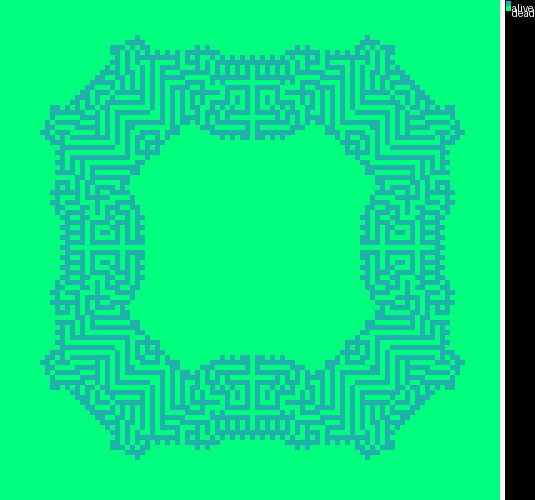

In [9]:
starting_state = setup.setup_particle(100, 30, "dead", "alive")
artist = SquareGridArtist2D(starting_state.structure, cell_artist)
controller = GameOfLifeController(starting_state.structure, Maze)
runner = SynchronousRunner(parallel=True)
result = runner.run(starting_state.state, controller, 60)
artist.jupyter_show(result.last_step, cell_size=5)
ResultArtist(artist, result).to_gif("Maze.gif", wait=0.2, cell_size=6)

### Other Lifes

You can specify any other life variant using the `Bxxx/Sxxx` syntax.

100%|████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:01<00:00, 54.54it/s]


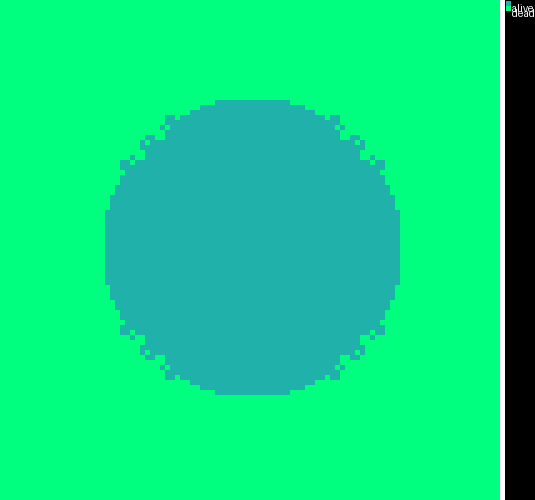

In [10]:
starting_state = setup.setup_particle(100, 30, "dead", "alive")
artist = SquareGridArtist2D(starting_state.structure, cell_artist)
controller = GameOfLifeController(starting_state.structure, variant="B3678/S34678")
runner = SynchronousRunner(parallel=True)
result = runner.run(starting_state.state, controller, 60)
artist.jupyter_show(result.last_step, cell_size=5)
ResultArtist(artist, result).to_gif("daynnite.gif", wait=0.2, cell_size=6)

100%|██████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:02<00:00, 57.07it/s]


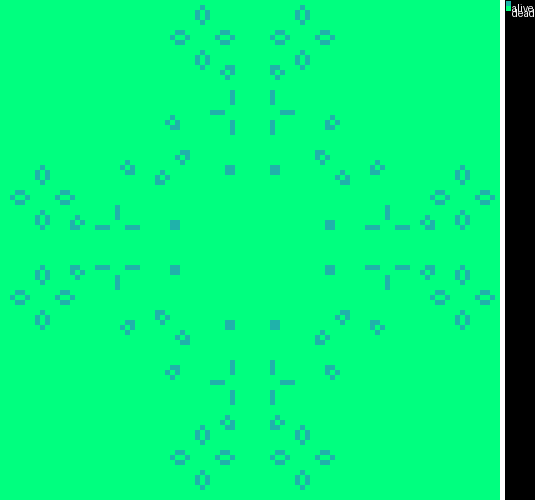

NameError: name 'DiscreteSquareGridResultArtist' is not defined

In [12]:
starting_state = setup.setup_particle(100, 30, "dead", "alive")
controller = GameOfLifeController(starting_state.structure,variant="B3/S238")
runner = SynchronousRunner(parallel=True)
result = runner.run(starting_state.state, controller, 150)
artist.jupyter_show(result.last_step, cell_size=5)
DiscreteSquareGridResultArtist(artist, result).to_gif("8life.gif", wait=0.2, cell_size=6)